In [1]:
%matplotlib notebook

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.fft


<IPython.core.display.Javascript object>


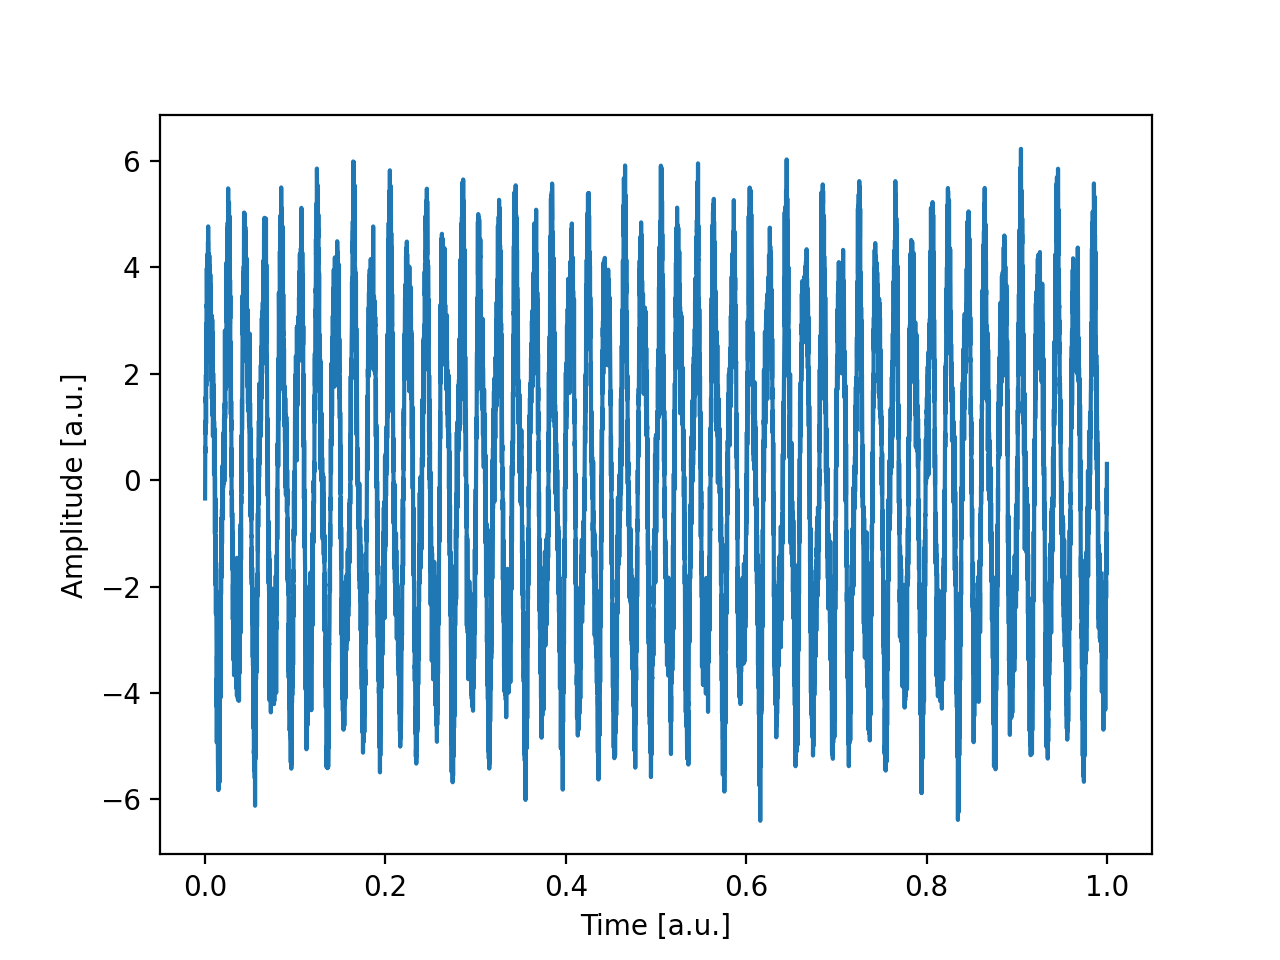

In [3]:
# Define parameters
fs = 1.e4
n_points = int(fs + 1)

# Generate time vector
t = np.arange(0., 1. + 1. / fs, 1 / fs)

# Define signal parameters
f1 = 50
f2 = 123
A1 = 2
A2 = 1
A_noise = 0.5

# Generate a synthetic signal
x = A1**2 * np.sin(2. * np.pi * f1 * t) + A2**2 * np.sin(2. * np.pi * f2 * t) + A_noise * np.random.randn(n_points)

# Plot the time-domain signal
plt.figure()
plt.plot(t, x)
plt.xlabel('Time [a.u.]')
plt.ylabel('Amplitude [a.u.]')
plt.show()

<IPython.core.display.Javascript object>


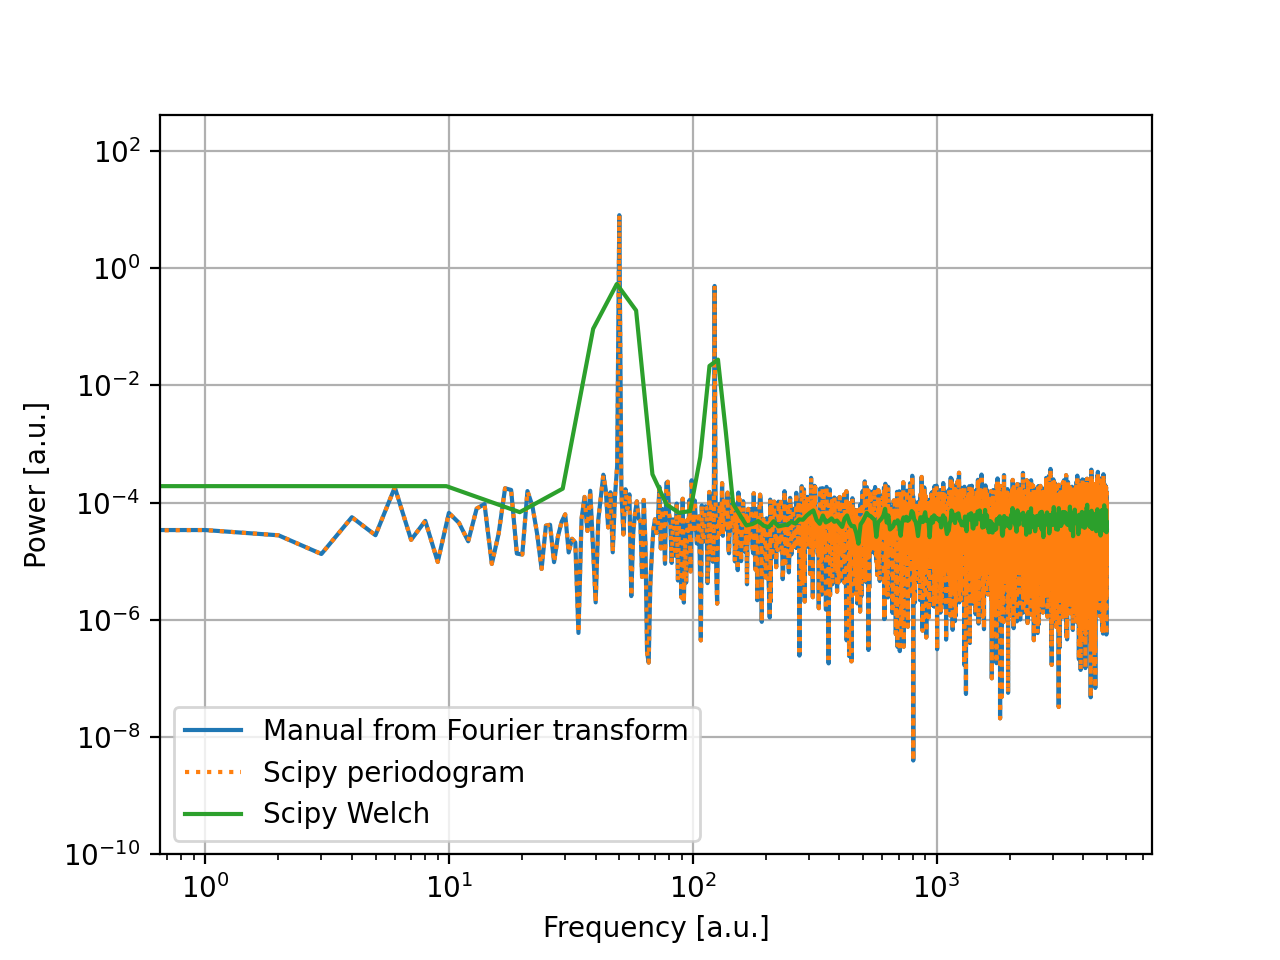

In [4]:
# Calculate the Fourier Transform and power spectrum
fft = scipy.fft.rfft(x)
freq = np.fft.rfftfreq(n_points, d=1. / fs)
power_f = np.abs(fft)**2 / 5.e7

# Calculate power spectrum using scipy's periodogram and Welch methods
f, Pxx_den = signal.periodogram(x, fs)
f_welch, Pxx_den_welch = signal.welch(x, fs, nperseg=1024)

# Plot the power spectrum
plt.figure()
plt.plot(freq, power_f, label='Manual from Fourier transform')
plt.plot(f, Pxx_den, ls=':', label='Scipy periodogram')
plt.plot(f_welch, Pxx_den_welch, label='Scipy Welch')
plt.grid()
plt.semilogx()
plt.semilogy()
plt.ylim(1.e-10, None)
plt.legend()
plt.xlabel('Frequency [a.u.]')
plt.ylabel('Power [a.u.]')
plt.show()